<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/SVM%2CXGBOOST%2CKNN_data_set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python
!pip install sklearn
!pip install xgboost
!pip install scikit-learn
!pip install torch
!pip install torchvision
!pip install torchaudio
!pip install torchtext
!pip install xgboost

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import sklearn
import xgboost
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn import metrics

In [ ]:
def image_reader(dir):
  lst=[]
  for image in os.listdir(dir):
    if "png" in image or "jpg" in image or "jpeg" in image or "PNG" in image or "JPG" in image or "JPEG" in image:
          img=cv.imread(dir+image,cv.IMREAD_GRAYSCALE)
          try:
            img=cv.resize(img,(80,80))
          except:
            print(image)
          lst.append(img)
  return np.array(lst)
def data_set_2():
  data_set_dict=dict()
  data_set_lst=[]
  negative_lst=image_reader("/content/drive/MyDrive/task_3_dataset/data_set_2/Negative/")
  positive_lst=image_reader("/content/drive/MyDrive/task_3_dataset/data_set_2/Positive/")
  data_set_dict[1]=positive_lst
  data_set_dict[0]=negative_lst
  data_set_lst.append(positive_lst)
  data_set_lst.append(negative_lst)
  data_set_lst=np.array(data_set_lst)
  #del positive_lst,negative_lst
  return data_set_dict,data_set_lst

In [ ]:
data_set_dict,data_set_lst=data_set_2()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
print(data_set_dict.keys())

dict_keys([1, 0])


In [ ]:
for class_image in data_set_dict.keys():
    print(np.array(data_set_dict[class_image]).shape)

(20000, 150, 150)
(17604, 150, 150)


In [ ]:
def show(class_name,class_num):
  for i in range(0,10):
    plt.imshow(data_set_dict[class_num][i],cmap="gray")
    plt.show()
    print(data_set_dict[class_num][i].shape)

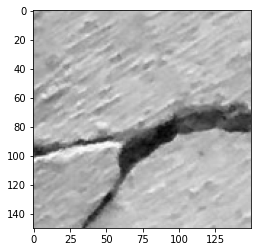

(150, 150)


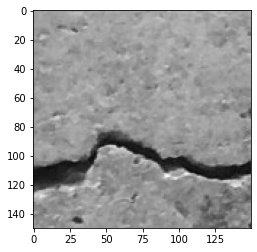

(150, 150)


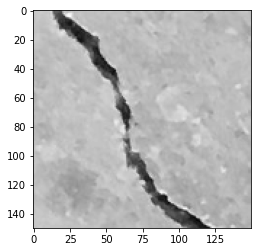

(150, 150)


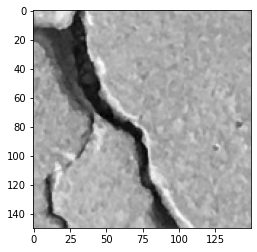

(150, 150)


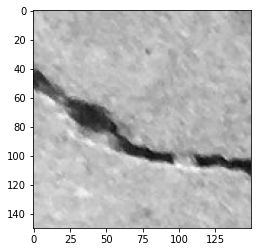

(150, 150)


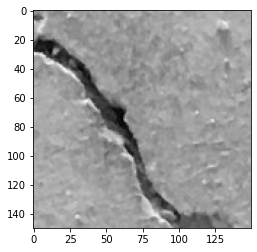

(150, 150)


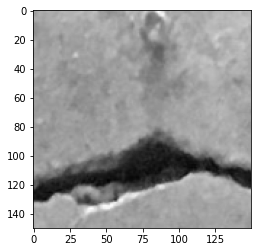

(150, 150)


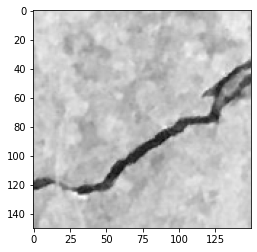

(150, 150)


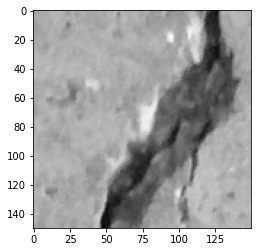

(150, 150)


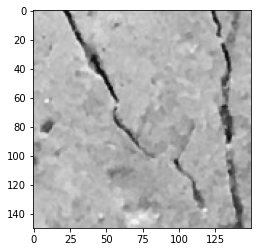

(150, 150)


In [ ]:
show('Positive',1)

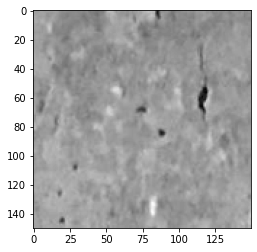

(150, 150)


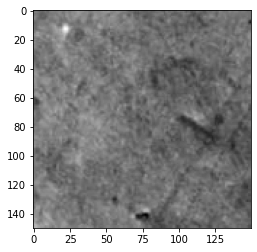

(150, 150)


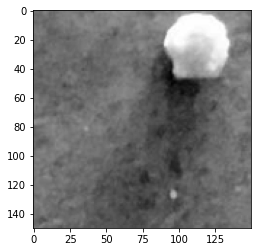

(150, 150)


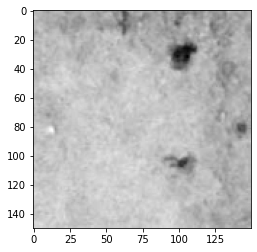

(150, 150)


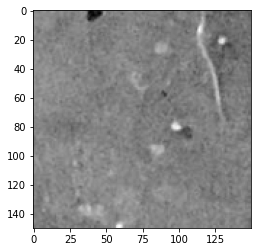

(150, 150)


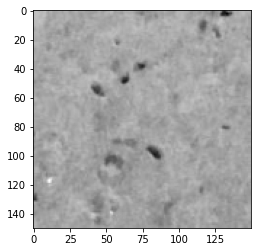

(150, 150)


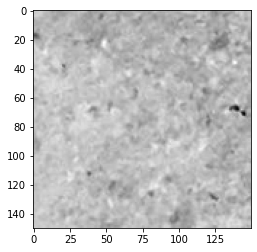

(150, 150)


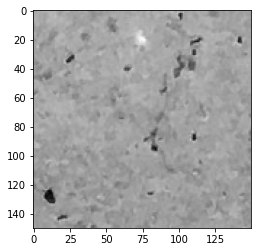

(150, 150)


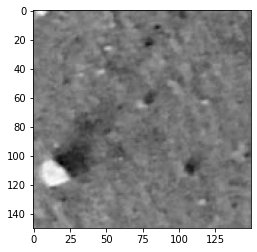

(150, 150)


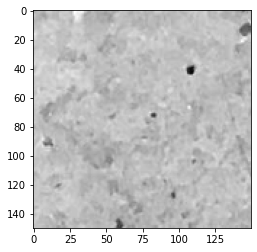

(150, 150)


In [ ]:
show('Negative',0)

In [ ]:
training_input_images=[]
training_targets=[]
class_label=0
for images in data_set_lst:
  for image in images:
    training_input_images.append(image)
    training_targets.append(class_label)
  class_label+=1
print(len(training_targets))
print(len(training_input_images))
print(np.array(training_input_images).shape)
counter_0=counter_1=0
for i in training_targets:
  if i ==1:
    counter_1+=1
  elif i==0:
    counter_0+=1

print(counter_1)
print(counter_0)
print(counter_0+counter_1)
del data_set_dict,data_set_lst

37604
37604
(37604, 80, 80)
17604
20000
37604


In [ ]:
training_set=np.array(training_input_images).reshape((len(training_input_images),-1))
X_train, X_test, y_train, y_test = train_test_split(
    training_set, training_targets, test_size=0.3, shuffle=True
)
del training_set

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
score=model_knn.score(X_test,y_test)
print(score)
predicted = model_knn.predict(X_test)

0.8045559297996809


In [ ]:
print(metrics.classification_report(y_true=y_test,y_pred=predicted))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      5898
           1       0.71      1.00      0.83      5384

    accuracy                           0.80     11282
   macro avg       0.85      0.81      0.80     11282
weighted avg       0.86      0.80      0.80     11282



In [ ]:
print(metrics.confusion_matrix(y_true=y_test,y_pred=predicted))

[[3693 2205]
 [   0 5384]]


In [ ]:
model_svm=sklearn.svm.LinearSVC()

In [ ]:
model_svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
score=model_svm.score(X_test,y_test)
print(score)
predicted_svm = model_svm.predict(X_test)

0.8676653075695798


In [ ]:
print(metrics.classification_report(y_true=y_test,y_pred=predicted_svm))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      5898
           1       0.79      0.98      0.88      5384

    accuracy                           0.87     11282
   macro avg       0.88      0.87      0.87     11282
weighted avg       0.89      0.87      0.87     11282



In [ ]:
print(metrics.confusion_matrix(y_true=y_test,y_pred=predicted_svm))

[[4509 1389]
 [ 104 5280]]
